## Uppgift E00

### Uppgift A

x-värden: [149.6714153   86.17356988 164.76885381 252.30298564  76.58466253
  76.58630431 257.92128155 176.74347292  53.05256141 154.25600436]
Finns det x-värden >= 300? True


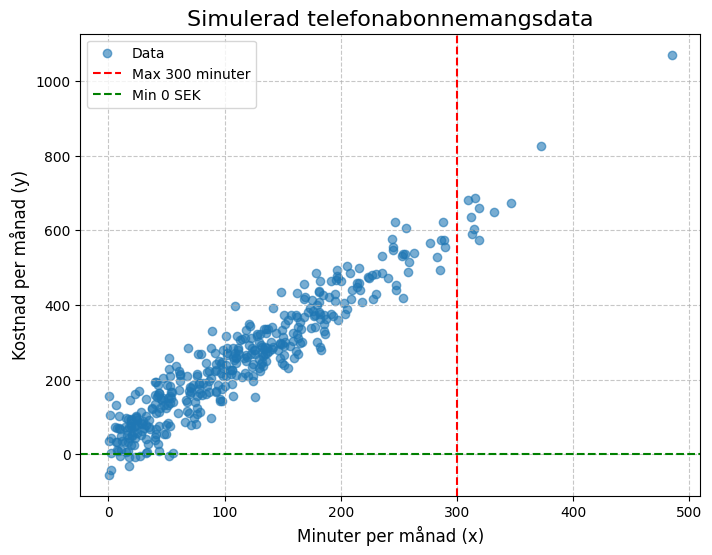

Antal datapunkter där x >= 300: 11
Antal datapunkter där y < 0: 8


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Simulera data
np.random.seed(42)  # Sätt seed för reproducerbarhet
x = np.random.normal(100, 100, 400) 
x = np.abs(x)  # Simulera x-värden och ta absolutvärde
epsilon = np.random.normal(0, 50, 400)  # Simulera brus
y = 2 * x + 25 + epsilon  # Beräkna y-värden

# Visa de första 10 x-värdena
print("x-värden:", x[:10])

# Kontrollera om något x-värde är >= 300
print("Finns det x-värden >= 300?", np.any(x >= 300))

# Plotta datasetet
plt.figure(figsize=(8, 6))  # Anpassa storleken på plotten
plt.scatter(x, y, alpha=0.6, label='Data')

# Lägg till boundaries
plt.axvline(x=300, color='red', linestyle='--', label='Max 300 minuter')  # Vertikal linje vid x=300
plt.axhline(y=0, color='green', linestyle='--', label='Min 0 SEK')  # Horisontell linje vid y=0

plt.title("Simulerad telefonabonnemangsdata", fontsize=16)
plt.xlabel("Minuter per månad (x)", fontsize=12)
plt.ylabel("Kostnad per månad (y)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Räkna antalet datapunkter där x >= 300 och y < 0
x_over_300 = np.sum(x >= 300)
y_under_0 = np.sum(y < 0)

# Skriv ut resultaten
print(f"Antal datapunkter där x >= 300: {x_over_300}")
print(f"Antal datapunkter där y < 0: {y_under_0}")

Förklaring:

1: np.random.seed(42): Säkerställer att samma slumpmässiga värden genereras varje gång koden körs.

2: np.random.normal(100, 100, 400): Skapar 400 x-värden från en normalfördelning med medelvärde 100 och standardavvikelse 10.

3: np.abs(): Tar absolutvärdet av x-värdena för att undvika negativa minuter.

4: np.random.normal(0, 50, 400): Skapar 400 brusvärden från en normalfördelning med medelvärde 0 och standardavvikelse 50.

5: y = 2 * x + 25 + epsilon: Beräknar y-värdena med hjälp av den givna formeln.

6: plt.scatter(): Plottar datapunkterna för att visualisera datasetet.

## Uppgift B

Plocka bort outliers

Längd av x, outliers borttagna: 381
Längd av y, outliers borttagna: 381


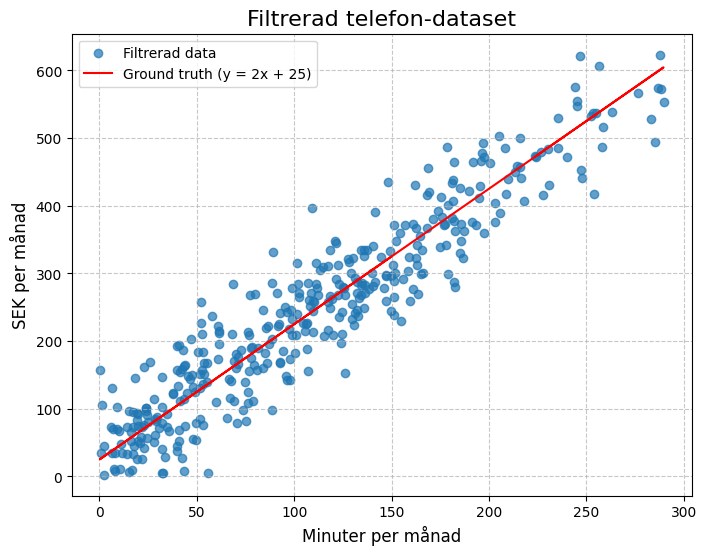

In [51]:

mask = (x <= 300) & (y >= 0)  # Skapa en mask för att filtrera bort outliers
x_filtered = x[mask]  # Filtrera x-värden
y_filtered = y[mask]  # Filtrera y-värden

# Skriv ut längden på de filtrerade värdena
print(f"Längd av x, outliers borttagna: {len(x_filtered)}")
print(f"Längd av y, outliers borttagna: {len(y_filtered)}")

# Rita upp det filtrerade datasetet
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, alpha=0.7, label='Filtrerad data')

# Rita "ground truth" med de sanna parametrarna
plt.plot(x_filtered, 2 * x_filtered + 25, color='red', label='Ground truth (y = 2x + 25)')

plt.title("Filtrerad telefon-dataset", fontsize=16)
plt.xlabel("Minuter per månad", fontsize=12)
plt.ylabel("SEK per månad", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Uppgift C

Skapa en databas med värderna

In [52]:
import pandas as pd

df = pd.DataFrame({"Minuter": filtered_x, "SEK": filtered_y})

df.head()



,Minuter,SEK
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
